<img align="left" src = https://project.lsst.org/sites/default/files/Rubin-O-Logo_0.png width=250, style="padding: 10px"> 
<b>Intermediate TAP Queries for DP0 catalogs </b> <br>
Last verified to run on 2021-06-25 with LSST Science Pipelines release w_2021_25 <br>
Contact authors: Leanne Guy <br>
Target audience: All DP0 delegates. <br>
Container Size: medium <br>
Questions welcome at <a href="https://community.lsst.org/c/support/dp0">community.lsst.org/c/support/dp0</a> <br>
Find DP0 documentation and resources at <a href="https://dp0-1.lsst.io">dp0-1.lsst.io</a> <br>

**Credit:** Originally developed by Leanne Guy in the context of the Rubin DP0.1. Please consider acknowledging Leanne Guy if this notebook is used for the preparation of journal articles or software releases.

### Learning Objectives

The Rubin Science Platform provides QUERY access to the DP0.1 catalogs via TAP from jupyter notebooks. TAP is a Virtual Observatory protocol for access to catalog data. In this tutorial, we will learn how to explore the DP0.1 archive via TAP and execute complex queries to retrieve data. Full TAP documentation can be found [here](https://www.ivoa.net/documents/TAP/).

This notebook demonstrates how to:<br>
1. Explore the DP0.1 schema and catalogs using the Rubin TAP service<br>
2. Query the DP0.1 Object and Truth Match catalogs, and retrieve data for analysis<br>
3. Visualize and interact with the retrieved data set<br>
4. Work with asynchronous TAP queries

### Set Up 

In [1]:
# Import general python packages
import numpy as np
import re
import pandas
from pandas.testing import assert_frame_equal
import matplotlib as plt

# Astropy
from astropy import units as u
from astropy.coordinates import SkyCoord

# Bokeh for interactive visualization
import bokeh
from bokeh.io import output_file, output_notebook, show
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource, CDSView, GroupFilter, HoverTool
from bokeh.plotting import figure
from bokeh.transform import factor_cmap

import holoviews as hv

# Set the maximum number of rows to display from pandas
pandas.set_option('display.max_rows', 20)

# Configure bokeh to generate output in notebook cells when show() is called.
output_notebook()

Loading BokehJS ...

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### 1. Explore the DP0.1 schema 

#### 1.1 Create the Rubin TAP Service client

Table Access Procotol (TAP) provides standardized access to catalog data for discovery, search, and retrieval. Full <a href="http://www.ivoa.net/documents/TAP">documentation for TAP</a> is provided by the International Virtual Observatory Alliance (IVOA).

The TAP service uses a query language similar to SQL (Structured Query Langage) called ADQL (Astronomical Data Query Language). The <a href="http://www.ivoa.net/documents/latest/ADQL.html">documentation for ADQL</a> includes more information about syntax and keywords.

**Hazard Warning:** Not all ADQL functionality is supported yet in the DP0 RSP.

In [3]:
# Import the Rubin TAP service utilities
from rubin_jupyter_utils.lab.notebook import get_tap_service, retrieve_query

# Get an instance of the TAP service
service = get_tap_service()
assert service is not None
assert service.baseurl == "https://data.lsst.cloud/api/tap"

Patching auth into notebook.base.handlers.IPythonHandler(notebook.base.handlers.AuthenticatedHandler) -> IPythonHandler(jupyterhub.singleuser.mixins.HubAuthenticatedHandler, notebook.base.handlers.AuthenticatedHandler)


#### 1.2 Schema discovery

To find out what schemas, tables and columns exist, we will query the Rubin TAP schema. 

### 2. Querying the DP0.1 Object and Truth Match catalogs

The Object catalog (dp01_dc2_catalogs.object) contains sources detected in the coadded images (also called stacked or combined images). The Object catalog is likely to be the catalog that is of the most interest to DP0 delgates. 

The `object` catalog is described in the <a href="https://arxiv.org/abs/2101.04855">DESC's DC2 data release note</a>, and more information about the simulated data can be found in the <a href="https://ui.adsabs.harvard.edu/abs/2021ApJS..253...31L/abstract">DESC's DC2 paper</a>. 

#### 2.2 Cone search around a point with specified radius

We will execute a cone search on the Object table centered on (RA, Dec) = (62.0, -37.0) with a radius of 0.1 degrees and applying a cut on magnitude.
We expect to get 15,670 results.

In [10]:
# Define our reference position on the sky and cone radius in arcseconds
# to use in all following examples
coord = SkyCoord(ra=53.1*u.degree, dec=-28.45*u.degree, frame='icrs')
#radius = 15 * u.deg


In [21]:
#QUADRANT 1

query1 = "SELECT ra, dec, mag_g, mag_i " \
    	"mag_i, mag_g_cModel, mag_r_cModel, mag_i_cModel, " \
    	"psFlux_g, psFlux_r, psFlux_i, " \
    	"cModelFlux_g, cModelFlux_r, cModelFlux_i, " \
    	"tract, patch, extendedness, good, clean " \
    	"FROM dp01_dc2_catalogs.object " \
    	"WHERE" \
     	" dec BETWEEN " + str(coord.dec.value) + " AND " + str(coord.dec.value+0.564)+  \
        " AND ra BETWEEN " + str(coord.ra.value) + " AND " + str(coord.ra.value+0.564)

print(query1)


SELECT ra, dec, mag_g, mag_i mag_i, mag_g_cModel, mag_r_cModel, mag_i_cModel, psFlux_g, psFlux_r, psFlux_i, cModelFlux_g, cModelFlux_r, cModelFlux_i, tract, patch, extendedness, good, clean FROM dp01_dc2_catalogs.object WHERE dec BETWEEN -33.2833 AND -32.7193 AND ra BETWEEN 52.6625 AND 53.2265


In [11]:
#QUADRANT 1

query1 = "SELECT * " \
    	"FROM dp01_dc2_catalogs.object " \
    	"WHERE" \
     	" dec BETWEEN " + str(coord.dec.value+.564) + " AND " + str(coord.dec.value)+  \
        " AND ra BETWEEN " + str(coord.ra.value) + " AND " + str(coord.ra.value+0.564)

print(query1)


SELECT * FROM dp01_dc2_catalogs.object WHERE dec BETWEEN -27.886 AND -28.45 AND ra BETWEEN 53.1 AND 53.664


In [44]:
#QUADRANT 2

query2 = "SELECT ra, dec, mag_g, mag_i " \
    	"mag_i, mag_g_cModel, mag_r_cModel, mag_i_cModel, " \
    	"psFlux_g, psFlux_r, psFlux_i, " \
    	"cModelFlux_g, cModelFlux_r, cModelFlux_i, " \
    	"tract, patch, extendedness, good, clean " \
    	"FROM dp01_dc2_catalogs.object " \
    	"WHERE " + \
    	" dec BETWEEN " + str(coord.dec.value) + " AND " + str(coord.dec.value+0.564) + \
        " AND ra BETWEEN " + str(coord.ra.value-0.564) + " AND " + str(coord.ra.value)
print(query2)

SELECT ra, dec, mag_g, mag_i mag_i, mag_g_cModel, mag_r_cModel, mag_i_cModel, psFlux_g, psFlux_r, psFlux_i, cModelFlux_g, cModelFlux_r, cModelFlux_i, tract, patch, extendedness, good, clean FROM dp01_dc2_catalogs.object WHERE  dec BETWEEN -33.2833 AND -32.7193 AND ra BETWEEN 52.0985 AND 52.6625


In [46]:
#QUADRANT 3

query3 = "SELECT ra, dec, mag_g, mag_i " \
    	"mag_i, mag_g_cModel, mag_r_cModel, mag_i_cModel, " \
    	"psFlux_g, psFlux_r, psFlux_i, " \
    	"cModelFlux_g, cModelFlux_r, cModelFlux_i, " \
    	"tract, patch, extendedness, good, clean " \
    	"FROM dp01_dc2_catalogs.object " \
        "WHERE ra BETWEEN " + str(coord.ra.value-0.564) + " AND " + str(coord.ra.value) + \
     	" AND dec BETWEEN " + str(coord.dec.value-0.564) + " AND " + str(coord.dec.value) #+  \
       
print(query3)

SELECT ra, dec, mag_g, mag_i mag_i, mag_g_cModel, mag_r_cModel, mag_i_cModel, psFlux_g, psFlux_r, psFlux_i, cModelFlux_g, cModelFlux_r, cModelFlux_i, tract, patch, extendedness, good, clean FROM dp01_dc2_catalogs.object WHERE ra BETWEEN 52.0985 AND 52.6625 AND dec BETWEEN -33.8473 AND -33.2833


In [49]:
#QUADRANT 4

query4 = "SELECT ra, dec, mag_g, mag_i " \
    	"mag_i, mag_g_cModel, mag_r_cModel, mag_i_cModel, " \
    	"psFlux_g, psFlux_r, psFlux_i, " \
    	"cModelFlux_g, cModelFlux_r, cModelFlux_i, " \
    	"tract, patch, extendedness, good, clean " \
    	"FROM dp01_dc2_catalogs.object " \
     	" WHERE dec BETWEEN " + str(coord.dec.value-0.564) + " AND " + str(coord.dec.value)+  \
        " AND ra BETWEEN " + str(coord.ra.value) + " AND " + str(coord.ra.value+0.564)
print(query4)

SELECT ra, dec, mag_g, mag_i mag_i, mag_g_cModel, mag_r_cModel, mag_i_cModel, psFlux_g, psFlux_r, psFlux_i, cModelFlux_g, cModelFlux_r, cModelFlux_i, tract, patch, extendedness, good, clean FROM dp01_dc2_catalogs.object  WHERE dec BETWEEN -33.8473 AND -33.2833 AND ra BETWEEN 52.6625 AND 53.2265


In [12]:
# For more detailed analysis of results, converting
# to a pandas dataframe is often very useful
results1= service.search(query1).to_table().to_pandas()
results1

,blendedness,clean,cModelFlux_flag_g,cModelFlux_flag_i,cModelFlux_flag_r,cModelFlux_flag_u,cModelFlux_flag_y,cModelFlux_flag_z,cModelFlux_g,cModelFlux_i,...,snr_r_cModel,snr_u_cModel,snr_y_cModel,snr_z_cModel,tract,x,xErr,xy_flag,y,yErr


In [86]:
results1.to_csv('table1.csv')

In [89]:
for col in results1.columns:
    print(col)

blendedness
clean
cModelFlux_flag_g
cModelFlux_flag_i
cModelFlux_flag_r
cModelFlux_flag_u
cModelFlux_flag_y
cModelFlux_flag_z
cModelFlux_g
cModelFlux_i
cModelFlux_r
cModelFlux_u
cModelFlux_y
cModelFlux_z
cModelFluxErr_g
cModelFluxErr_i
cModelFluxErr_r
cModelFluxErr_u
cModelFluxErr_y
cModelFluxErr_z
dec
extendedness
good
I_flag
I_flag_g
I_flag_i
I_flag_r
I_flag_u
I_flag_y
I_flag_z
Ixx_pixel
Ixx_pixel_g
Ixx_pixel_i
Ixx_pixel_r
Ixx_pixel_u
Ixx_pixel_y
Ixx_pixel_z
IxxPSF_pixel
IxxPSF_pixel_g
IxxPSF_pixel_i
IxxPSF_pixel_r
IxxPSF_pixel_u
IxxPSF_pixel_y
IxxPSF_pixel_z
Ixy_pixel
Ixy_pixel_g
Ixy_pixel_i
Ixy_pixel_r
Ixy_pixel_u
Ixy_pixel_y
Ixy_pixel_z
IxyPSF_pixel
IxyPSF_pixel_g
IxyPSF_pixel_i
IxyPSF_pixel_r
IxyPSF_pixel_u
IxyPSF_pixel_y
IxyPSF_pixel_z
Iyy_pixel
Iyy_pixel_g
Iyy_pixel_i
Iyy_pixel_r
Iyy_pixel_u
Iyy_pixel_y
Iyy_pixel_z
IyyPSF_pixel
IyyPSF_pixel_g
IyyPSF_pixel_i
IyyPSF_pixel_r
IyyPSF_pixel_u
IyyPSF_pixel_y
IyyPSF_pixel_z
mag_g
mag_g_cModel
mag_i
mag_i_cModel
mag_r
mag_r_cModel
mag_u

In [45]:
results2= service.search(query2).to_table().to_pandas()
results2

,ra,dec,mag_g,mag_i,mag_g_cModel,mag_r_cModel,mag_i_cModel,psFlux_g,psFlux_r,psFlux_i,cModelFlux_g,cModelFlux_r,cModelFlux_i,tract,patch,extendedness,good,clean
0,52.153885,-33.040974,26.881960,26.169920,26.931566,26.618811,26.238751,64.152866,80.837045,123.603829,61.287735,81.747679,116.011161,4225,"6,5",0.0,True,True
1,52.168919,-33.012274,25.338189,25.799590,25.235736,25.447829,25.686105,265.903667,218.566695,173.845663,292.217151,240.363408,193.000276,4225,"6,5",1.0,True,True
2,52.240660,-33.038269,26.257090,26.642126,26.261113,26.275132,26.637046,114.068080,109.378192,80.010998,113.646144,112.188193,80.386236,4225,"6,5",1.0,True,True
3,52.155486,-33.040068,26.384748,25.137184,25.999245,25.592992,24.642897,101.414694,150.026235,319.982583,144.644558,210.282446,504.476666,4225,"6,5",1.0,True,True
4,52.170670,-33.010422,24.239027,23.893784,23.904368,23.661003,23.530899,731.794560,870.106802,1005.741987,995.985147,1246.231106,1404.883510,4225,"6,5",1.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136557,52.293037,-33.055345,26.647722,25.578854,26.657819,26.426728,25.578130,79.599668,99.261665,213.038592,78.862809,97.568271,213.180698,4225,"5,5",0.0,True,True
136558,52.446961,-33.049742,26.604088,25.466141,25.915555,25.456189,24.746502,82.863756,128.769003,236.343520,156.234856,238.519801,458.563426,4225,"5,5",1.0,True,True
136559,52.445390,-33.054953,23.002869,22.367437,22.485648,22.469359,21.841909,2284.821016,2406.091230,4102.278054,3679.092307,3734.704055,6656.355827,4225,"5,5",1.0,True,True
136560,52.310300,-33.053176,25.511275,25.491826,24.834674,24.904890,24.809191,226.720005,231.437786,230.818028,422.795661,396.318062,432.836336,4225,"5,5",1.0,True,True


In [47]:
results3= service.search(query3).to_table().to_pandas()
results3

,ra,dec,mag_g,mag_i,mag_g_cModel,mag_r_cModel,mag_i_cModel,psFlux_g,psFlux_r,psFlux_i,cModelFlux_g,cModelFlux_r,cModelFlux_i,tract,patch,extendedness,good,clean
0,52.316323,-33.681855,27.141862,30.054172,26.708904,26.700660,28.446492,50.495819,46.313660,3.454070,75.238182,75.811672,15.184600,4225,"5,2",1.0,True,True
1,52.321163,-33.684511,23.276138,22.586177,22.791779,22.272208,22.071467,1776.417170,2792.537459,3353.740042,2775.162825,4478.338046,5387.821422,4225,"5,2",1.0,True,True
2,52.298197,-33.799014,27.162919,26.757289,25.411817,24.784500,24.456814,49.525909,53.729822,71.958883,248.469576,442.792421,598.789587,4225,"5,2",NaN,True,True
3,52.300943,-33.795839,26.644943,28.286124,26.647282,28.235819,28.286080,79.803667,18.530807,17.601532,79.631885,18.436236,17.602236,4225,"5,2",0.0,True,True
4,52.325558,-33.778768,27.029255,27.448017,27.014439,28.606346,27.449961,56.014159,13.996949,38.088431,56.783774,13.105745,38.020316,4225,"5,2",0.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134353,52.635254,-33.712372,26.143934,25.365953,25.910336,25.923309,25.099981,126.597893,133.042340,259.190343,156.987688,155.123138,331.136789,4225,"4,2",1.0,True,True
134354,52.635978,-33.712587,26.486155,25.878925,26.493167,26.192108,25.894289,92.371483,122.998667,161.595769,91.776840,121.103498,159.325141,4225,"4,2",0.0,True,True
134355,52.634762,-33.712061,26.780662,27.160622,26.211195,26.103437,26.482053,70.426388,76.550014,49.630790,118.993142,131.409015,92.721166,4225,"4,2",1.0,True,True
134356,52.618280,-33.711694,24.757822,24.019782,24.407445,24.103683,23.672223,453.806876,558.029384,895.544266,626.645409,828.946655,1233.419506,4225,"4,2",1.0,True,True


In [50]:
results4= service.search(query4).to_table().to_pandas()
results4

,ra,dec,mag_g,mag_i,mag_g_cModel,mag_r_cModel,mag_i_cModel,psFlux_g,psFlux_r,psFlux_i,cModelFlux_g,cModelFlux_r,cModelFlux_i,tract,patch,extendedness,good,clean
0,53.025185,-33.698783,24.876919,24.527564,24.511876,24.236175,24.121047,406.660788,510.580155,561.014977,569.179821,733.719140,815.795173,4225,"3,2",1.0,True,True
1,53.030349,-33.699038,26.549231,25.925521,26.025602,25.782776,25.369653,87.158091,114.552234,154.807374,141.175468,176.558843,258.308650,4225,"3,2",1.0,True,True
2,53.029529,-33.699133,27.762501,25.941061,27.364812,26.157382,25.599211,28.510152,86.157132,152.607377,41.122076,125.039461,209.081403,4225,"3,2",1.0,True,True
3,53.024433,-33.699031,26.367627,25.571894,26.020501,25.607356,25.101112,103.026611,160.151502,214.408658,141.840303,207.518828,330.792273,4225,"3,2",1.0,True,True
4,53.026840,-33.700622,26.466531,25.712870,25.986281,25.648894,25.205202,94.056194,131.468491,188.300808,146.381975,199.729564,300.551658,4225,"3,2",1.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137097,52.752972,-33.712814,27.010585,25.570819,26.905290,25.830284,25.468239,56.985694,154.038512,214.621011,62.789049,168.999926,235.887274,4225,"4,2",1.0,True,True
137098,52.753130,-33.713589,26.220504,25.728204,25.775536,25.659115,25.345413,117.977307,131.015073,185.660077,177.740233,197.858214,264.140486,4225,"4,2",1.0,True,True
137099,52.752831,-33.711961,26.848016,27.481217,26.102954,26.411880,26.370611,66.190168,42.162838,36.941395,131.467465,98.911777,102.743828,4225,"4,2",1.0,True,True
137100,52.780978,-33.472445,26.616105,27.009997,26.630339,26.805616,27.033181,81.951735,71.168429,57.016590,80.884364,68.826195,55.812002,4225,"4,3",0.0,True,True


<AxesSubplot:xlabel='ra', ylabel='dec'>

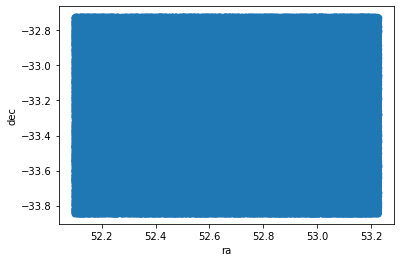

In [60]:
#Make a plot showing the results
#results.plt(coord_ra,coord_dec)

frames = [results1, results2, results3, results4]
results5 = pd.concat(frames)

results1.to_csv('results1.out')
results2.to_csv('results2.out')
results3.to_csv('results3.out')
results4.to_csv('results4.out')
results5.to_csv('results5.out')
#results1.plot.scatter('ra', 'dec')
#results2.plot.scatter('ra', 'dec')
#results3.plot.scatter('ra', 'dec')
#results4.plot.scatter('ra', 'dec')
results5.plot.scatter('ra','dec')
#results2.plot.scatter('ra', 'dec')
#results3.plot.scatter('ra', 'dec')
#results4.plot.scatter('ra', 'dec')
#plt.plot(results2.ra, result2.dec)
#print(results2.dec)
#plt.show()
#len(results)

<AxesSubplot:xlabel='ra', ylabel='dec'>

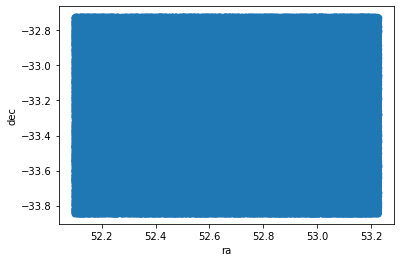

In [56]:
#Make a plot showing the results
#results.plt(coord_ra,coord_dec)

frames = [results1, results2, results3, results4]
result5 = pd.concat(frames)

result5.plot.scatter('ra','dec')
#results2.plot.scatter('ra', 'dec')
#results3.plot.scatter('ra', 'dec')
#results4.plot.scatter('ra', 'dec')
#plt.plot(results2.ra, result2.dec)
#print(results2.dec)
#plt.show()
#len(results)

In [ ]:
query = "SELECT ra, dec, mag_g, mag_i " \
        "mag_i, mag_g_cModel, mag_r_cModel, mag_i_cModel, " \
        "psFlux_g, psFlux_r, psFlux_i, " \
        "cModelFlux_g, cModelFlux_r, cModelFlux_i, " \
        "tract, patch, extendedness, good, clean " \
        "FROM dp01_dc2_catalogs.object " \
        "WHERE CONTAINS(POINT('ICRS', ra, dec),CIRCLE('ICRS', " \
        + str(coord.ra.value) + ", " + str(coord.dec.value) + ", " \
        + str(radius.value) + " )) = 1"
print(query)

In [ ]:
# For more detailed analysis of results, converting
# to a pandas dataframe is often very useful
results = service.search(query).to_table().to_pandas()

# Use an assertion to make sure we got the correct number of results.
assert len(results) == 15670

#### 2.3. Cone search joining the results with the truth infomation 

We will now join the results from the above query with the truth information.  We will also add in some quality filters on the match. Objects in the truth-match table that do not have matches in the object table have “match_objectId = -1,” while those with legitimate matches contain the ‘objectId’ of the corresponding object from the object table in “match_objectId.” By requiring this to be greater than or equal to zero, we extract only objects with matches. We also keep only sources satisfying the “is_good_match” flag, which is described in the schema as being “True if this object–truth matching pair satisfies all matching criteria.” (Note that “1” and “TRUE” are equivalent in ADQL.)

With these additional quality filters applied to the matching with the truth information, we only get 14424 results.

In [ ]:
query = "SELECT obj.objectId, obj.ra, obj.dec, obj.mag_g, obj.mag_r, " \
        " obj.mag_i, obj.mag_g_cModel, obj.mag_r_cModel, obj.mag_i_cModel," \
        "obj.psFlux_g, obj.psFlux_r, obj.psFlux_i, obj.cModelFlux_g, " \
        "obj.cModelFlux_r, obj.cModelFlux_i, obj.tract, obj.patch, " \
        "obj.extendedness, obj.good, obj.clean, " \
        "truth.mag_r as truth_mag_r, truth.match_objectId, "\
        "truth.flux_g, truth.flux_r, truth.flux_i, truth.truth_type, " \
        "truth.match_sep, truth.is_variable " \
        "FROM dp01_dc2_catalogs.object as obj " \
        "JOIN dp01_dc2_catalogs.truth_match as truth " \
        "ON truth.match_objectId = obj.objectId " \
        "WHERE CONTAINS(POINT('ICRS', obj.ra, obj.dec),CIRCLE('ICRS', " \
        + str(coord.ra.value) + ", " + str(coord.dec.value) + ", " \
        + str(radius.value) + " )) = 1 " \
        "AND truth.match_objectid >= 0 "\
        "AND truth.is_good_match = 1"

In [ ]:
results = service.search(query).to_table().to_pandas()
assert len(results) == 14424

> If you see a pink-highlighted "Note: NumExpr detected..." message after executing the next cell, know that it is not a warning and it is safe to ingore.

In [ ]:
# How many of each type in the dataset
# The 'truth_type' in the truth_match table is 1= galaxies, 2=stars, 3=SNe
n_stars = results[results["truth_type"] == 2].shape[0]
print(f'There are {n_stars} stars out of a total of {len(results)}')
print(f'There are {results[results["truth_type"] == 1].shape[0]} galaxies')
print(f'There are {results[results["truth_type"] == 3].shape[0]} SNe')

### 3. Visualize and analyse the results

Now we will do some interactive analysis with the data we have above. We will use bokeh to create interactive plots so that we can explore the dataset, using multiple panels showing different representations of the same dataset. A selection applied to either panel will highlight the selected points in the other panel.

<a href="https://bokeh.org/">Bokeh Documentation</a> <br>
<a href="https://holoviews.org/">Holoviews Documentation</a>

#### 3.1 Data preparation
The basis for any data visualization is the underlying data. We will prepare ColumnDataSource (CDS) from the data returned by the query above that can be passed directly to bokeh. The CDS is the core of bokeh plots. Bokeh automatically creates a CDS from data passed as python lists or numpy arrays.  CDS are useful as they allow data to be shared between multiple plots and renderers, enabling brushing and linking.  A CDS is essentially a collection of sequences of data that have their own unique column name. 

Getting the data preparation phase right is key to creating powerful visualizations. 

In [ ]:
# Create a python dictionary to store the data from the
# query and pass to the ColumnDataSource
# All columns in a CDS must have the same length
data = dict(ra=results['ra'], dec=results['dec'],
            target_ra=results['ra']-coord.ra.value,
            target_dec=results['dec']-coord.dec.value,
            gmi=results['mag_g_cModel']-results['mag_i_cModel'],
            gmag=results['mag_g_cModel'],
            rmag=results['mag_r_cModel'],
            imag=results['mag_i_cModel']
            )
source = ColumnDataSource(data=data)

# Additional data can be added to the Column Data Source after creation
source.data['objectId'] = results['objectId']

# We will want to filter on the truth type later
# We will convert the truth_type integer to a more descriptive string
object_map = {1: 'galaxy', 2: 'star', 3: 'SNe'}
source.data['truth_type'] = results['truth_type'].map(object_map)

In [ ]:
# Check the truth_type has been updated
source.data['truth_type']

#### 3.2 Color-Magnitude Diagram 
We will use bokeh to plot a color-magnitude (g vs. g-i) diagram making use of the cModel magnitudes. Hover over the points 
in the plot to see their values. 

In [ ]:
# Define the plot asthetics and tools
plot_options = {'plot_height': 400, 'plot_width': 400,
                'tools': ['box_select', 'reset', 'box_zoom', 'help']}
# Define the hover tool
tooltips = [
    ("Col (g-i)", "@gmi"),
    ("Mag (g)", "@gmag"),
    ("Mag (r)", "@rmag"),
    ("Mag (i)", "@imag"),
    ("Type", "@truth_type")
]
hover_tool_cmd = HoverTool(tooltips=tooltips)

In [ ]:
# Create a Colour-Magnitude Diagram, color coding the different object types
p = figure(title="Colour - Magnitude Diagram",
           x_axis_label='g-i', y_axis_label='g',
           x_range=(-1.8, 4.3), y_range=(29.5, 16),
           **plot_options)

# Define a palette for the truth types
truth_type_palette = ['darkred', 'lightgrey', 'blue']
p.add_tools(hover_tool_cmd)
p.circle(x='gmi', y='gmag', source=source,
         size=3, alpha=0.6,
         legend_field="truth_type",
         color=factor_cmap('truth_type',
                           palette=truth_type_palette,
                           factors=['star', 'galaxy', 'SNe']),
         hover_color="firebrick")
show(p)

#### 3.3 Color-color (r-i vs. g-r) diagram. 
We will add a color-color (r-i vs. g-r) diagram and make use of the advanced linking features of bokeh to enable brushing and linking between the the color-magnitude diagram and this color-color plot. The CMD in 4.2 is very crowded as it contains 14424 data points. We will now filter on the truth-type to plot stars only.

In [ ]:
# We will now add some additional data to our data structure to
# create a colour-colour diagram
source.data['rmi'] = results['mag_r_cModel'] - results['mag_i_cModel']
source.data['gmr'] = results['mag_g_cModel'] - results['mag_r_cModel']

In [ ]:
# Use a GroupFilter to select rows from the
# CDS that satisfy 'truth_type' stars
stars = CDSView(source=source,
                filters=[GroupFilter(column_name='truth_type', group="star")])

In [ ]:
# Define various options for the plot
plot_options = {'plot_height': 350, 'plot_width': 350,
                'tools': ['box_zoom', 'box_select',
                          'lasso_select', 'reset', 'help']}


# Create the hover tool for these plots
hover_tool = HoverTool(tooltips=[("(RA,DEC)", "(@ra, @dec)"),
                                 ("(g-r,g)", "(@gmr, @gmag)"),
                                 ("objectId", "@objectId"),
                                 ("type", "@truth_type")])


# Spatial plot
title_spatial = f'Spatial centred on (RA,DEC) = \
({coord.ra.value},{coord.dec.value})'

fig_spatial = figure(title=title_spatial,
                     x_axis_label="Delta RA", y_axis_label="Delta DEC",
                     **plot_options)
fig_spatial.circle(x='target_ra', y='target_dec',
                   source=source, view=stars,
                   size=4.0, alpha=0.6,
                   color='teal', hover_color='firebrick')
fig_spatial.add_tools(hover_tool)

# Colour magnitude plot
fig_cmag = figure(title="Colour-Magnitude Diagram",
                  x_axis_label="g-r", y_axis_label="g",
                  x_range=(-1.0, 3.5), y_range=(29.5, 16),
                  **plot_options)
fig_cmag.circle(x='gmr', y='gmag', source=source, view=stars,
                size=4.0, alpha=0.6,
                color='teal', hover_color='firebrick')
fig_cmag.add_tools(hover_tool)

# Colour colour plot
fig_cc = figure(title="Colour-Colour Diagram",
                x_axis_label="g-r", y_axis_label="r-i",
                x_range=(-1.0, 3.5), y_range=(-1.0, 3.5),
                **plot_options)
fig_cc.circle(x='gmr', y='rmi', source=source, view=stars,
              size=4.0, alpha=0.6,
              color='teal', hover_color='firebrick')
fig_cc.add_tools(hover_tool)

# Plot all three on a grid
p = gridplot([[fig_spatial, fig_cmag, fig_cc]])
show(p)

Use the hover tool to see information about individual datapoints (e.g., the object_id). 
This information should appear automatically as you hover the mouse over the datapoints in any of the plots.
Notice the data points highlighted in red on one panel with the hover tool are also highlighted on the other panels.

Click on the selection box icon (with a "+" sign) or the selection lasso icon found in the upper right corner of the figure. 
Use the selection box and selection lasso to make various selections in either panel by clicking and dragging on either panel. 
The selected data points will be displayed in the other panel.

#### 3.4 Comparison with truth information 
Let's compare the measurements from the Object table to the “true” values for some objects. 
We’ll compare the recovered flux to the “true” value that was simulated for each object (as a ratio of the fluxes).

In [ ]:
# Another way that data can be added to the CDS
source.add(results['cModelFlux_r'] / results['flux_r'], name='flux_ratio')
source.add(results['truth_mag_r'], name='truth_mag_r')

In [ ]:
# Create a plot of the distribution of objects on
# sky using the ColumnDataSource's two columns
plot_options = {'plot_height': 300, 'plot_width': 800,
                'tools': ['box_zoom', 'box_select', 'reset', 'help']}

# Define the tooltips and create a HoverTool instance
tooltips = [
    ("Measured/True flux", "@flux_ratio"),
    ("Mag (r)", "@truth_mag_r"),
    ("Type", "@truth_type")
]
hover_tool = HoverTool(tooltips=tooltips)

# Create a new figure
p = figure(title="Measured/true flux vs true magnitude",
           x_range=(16, 29.5), y_range=(0.15, 2.4),
           x_axis_label='r magnititude (truth)',
           y_axis_label='Measured flux / True flux (r band)',
           **plot_options)
# Add a circle renderer defining several attributes
p.circle(x='truth_mag_r', y='flux_ratio',
         size=3, alpha=0.5, source=source,
         legend_field="truth_type",
         color=factor_cmap('truth_type',
                           palette=truth_type_palette,
                           factors=['star', 'galaxy', 'SNe']))

# Add the hover tool created above to the figure
p.add_tools(hover_tool)

# Display
show(p)

### 4.0 Asynchronous TAP queries

So far, we have executed all queries as synchronous queries. This means that the query will continue executing in the notebook until it is finished. You can see when the Jupyter cell is running by the asterisk to the left of the  cell. For synchronous queries, the cell will continue to run until the query completes and the results are returned. The asterisk will then become a number. This is a good option for short queries that take order seconds to minutes.

For longer queries, or for running multiple queries at the same time, an asynchronous query may be more suitable. Asynchronous queries allow you to execute more python while the query runs on the database. Results can be retrieved later on. This is especially important for queries that are long or may return a lot of results. It is also safeguards long queries against network outages or timeouts. 

#### 4.1 Submit and run a job
We will use the cone search joining the results with the truth infomation query from 2.3 and confirm that the results from the asynchronous query are the same as from the synchronous query

In [ ]:
# Create and submit the job. This step does not run the query yet
job = service.submit_job(query)

# # Get the job URL
print('Job URL is', job.url)

# Get the job phase. It will be pending as we have not yet started the job
print('Job phase is', job.phase)

In [ ]:
# Run the job. You will see that the the cell completes executing,
# even though the query is still running
job.run()

In [ ]:
# Use this to tell python to wait for the job to finish if
# you don't want to run anything else while waiting
# The cell will continue executing until the job is finished
job.wait(phases=['COMPLETED', 'ERROR'])
print('Job phase is', job.phase)

In [ ]:
# A usefull funtion to raise an exception if there was a problem with the query
job.raise_if_error()

In [ ]:
# Once the job completes successfully, you can fetch the results
async_results = job.fetch_result()

# Assert that the results are the same as obtained from
# executing synchronous queries
assert len(async_results) == 14424
assert_frame_equal(results, async_results.to_table().to_pandas())

#### 4.2 Retrieving the results from a previous asynchronous job
Job results may still be available from previously run queries. You can retrieve these results if you know the URL of the job.
This includes jobs executed in the Portal. You can retrieve the URL for the query and retrieve the results

In [ ]:
retrieved_job = retrieve_query(job.url)
retrieved_results = retrieved_job.fetch_result()
assert len(retrieved_results) == 14424
assert_frame_equal(retrieved_results.to_table().to_pandas(),
                   async_results.to_table().to_pandas())

#### 4.3 Deleting a job
Once the job is finished and you have retrieved your results, you can delete the job and the results from the server. The results will be deleted automatically after a period of time.

In [ ]:
job.delete()